## Setup: Import Libraries and Load Data

This section loads the necessary Python libraries and reads the preprocessed CSV data files used for generating the visualizations in the results section.


In [6]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Load data
pr_durations = pd.read_csv("../data/processed/pr_durations_by_phase.csv")
contributor_overlap = pd.read_csv("../data/processed/contributor_overlap.csv")
repo_summary = pd.read_csv("../data/processed/repo_summary_overview.csv")

# Display first few rows as a quick check
print("PR Durations:")
display(pr_durations.head())

print("\nContributor Overlap:")
display(contributor_overlap.head())

print("\nRepository Summary:")
display(repo_summary.head())


PR Durations:


,covid_phase,closed_duration_days,merged_duration_days,repository
0,during,2.150249,1.958113,scikit-learn
1,post,3.694317,3.749491,scikit-learn
2,pre,2.820758,1.824502,scikit-learn
3,during,3.343270,0.889664,pytorch
4,post,2.502390,0.642928,pytorch



Contributor Overlap:


,Unnamed: 0,pre_during,during_post,pre_post
0,scikit-learn,0.074246,0.042003,0.026278
1,pytorch,0.058002,0.072794,0.021306
2,kubernetes,0.113153,0.085634,0.037828
3,apache-spark,0.143825,0.169444,0.065399



Repository Summary:


,repository,total_prs,total_contributors,bots_detected,prs_pre,prs_during,prs_post,contributors_pre,contributors_during,contributors_post
0,scikit-learn,10766,2810,445,3436,6211,1085,1144,1634,301
1,pytorch,75414,13121,1121,18264,46773,10265,3096,8651,2800
2,kubernetes,43416,28789,1706,19803,20341,3213,14113,15567,3665
3,apache-spark,24387,2115,795,7229,13654,3475,956,1239,445


## PR Duration by Repository and Phase

This plot shows the average duration of pull requests across the three pandemic phases, providing insight into how collaboration timing evolved.


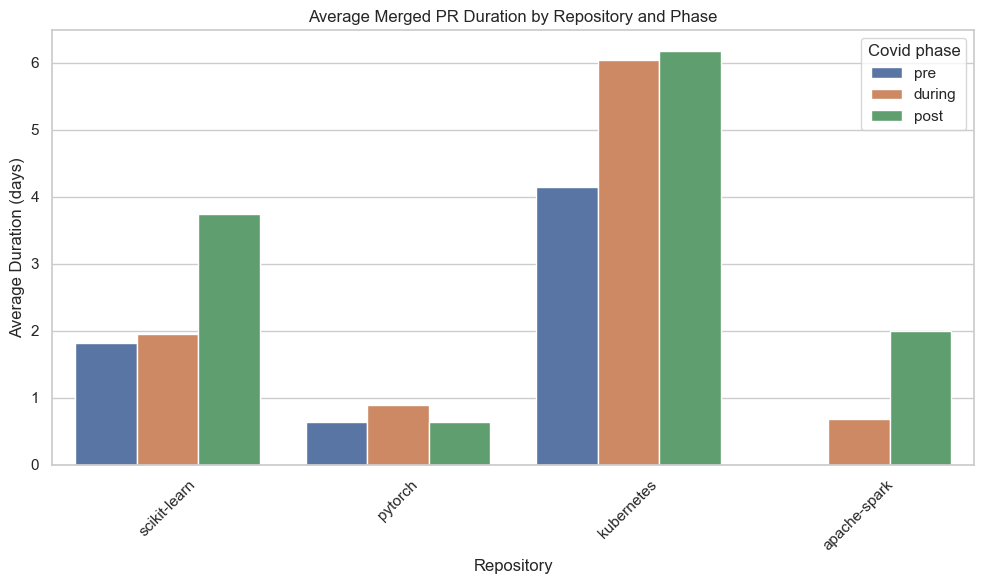

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=pr_durations,
    x="repository",
    y="merged_duration_days",
    hue="covid_phase",
    hue_order=["pre", "during", "post"]
)
plt.title("Average Merged PR Duration by Repository and Phase")
plt.ylabel("Average Duration (days)")
plt.xlabel("Repository")
plt.xticks(rotation=45)
plt.legend(title="Covid phase")
plt.tight_layout()
plt.show()


C:\Users\20225118\AppData\Local\Temp\ipykernel_21084\2653511672.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


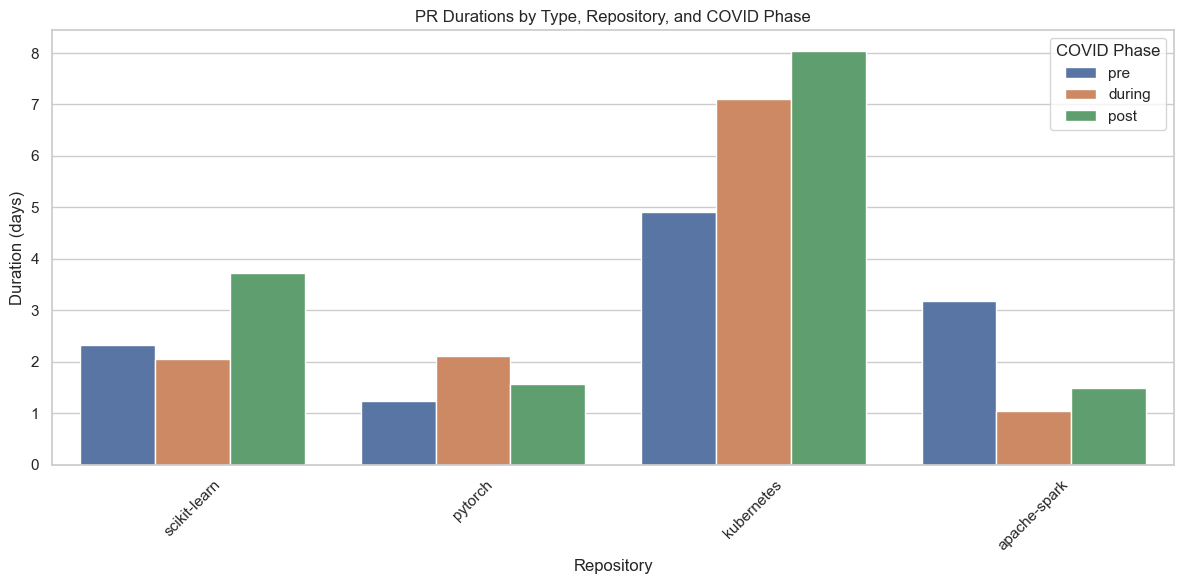

In [12]:
# Melt the dataframe
melted = pr_durations.melt(
    id_vars=["repository", "covid_phase"],
    value_vars=["closed_duration_days", "merged_duration_days"],
    var_name="duration_type",
    value_name="duration_days"
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=melted,
    x="repository",
    y="duration_days",
    hue="covid_phase",
    hue_order=["pre", "during", "post"],
    ci=None
)
plt.title("PR Durations by Type, Repository, and COVID Phase")
plt.ylabel("Duration (days)")
plt.xlabel("Repository")
plt.xticks(rotation=45)
plt.legend(title="COVID Phase")
plt.tight_layout()
plt.show()


## Contributor Overlap Between Periods

This plot visualizes the percentage of overlapping contributors between consecutive phases. It indicates how stable the contributor base is across time.


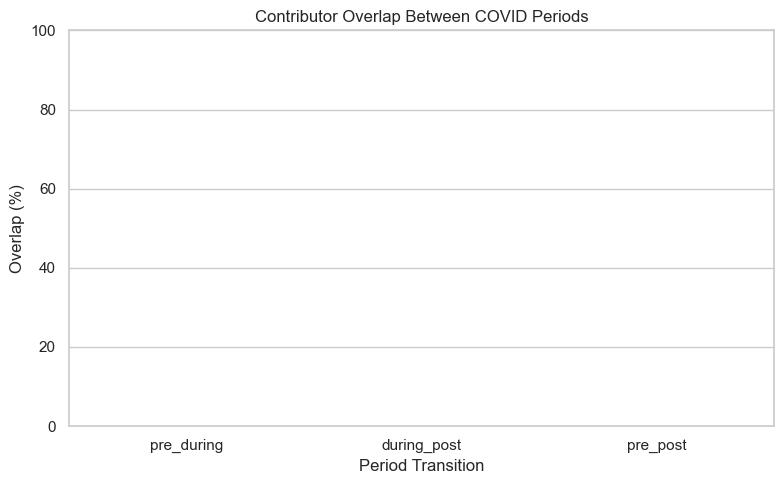

In [15]:
# Reshape and convert overlap values to numeric
contrib_long = contributor_overlap.melt(var_name="period_pair", value_name="overlap_percentage")
contrib_long["overlap_percentage"] = pd.to_numeric(contrib_long["overlap_percentage"], errors="coerce")

# Drop rows with missing or invalid values
contrib_long = contrib_long.dropna(subset=["overlap_percentage"])

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=contrib_long, x="period_pair", y="overlap_percentage", palette="Blues_d")
plt.title("Contributor Overlap Between COVID Periods")
plt.ylabel("Overlap (%)")
plt.xlabel("Period Transition")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


## Summary Table: PR Volume by Repository and Phase

An overview of the total number of PRs submitted during each phase per repository.


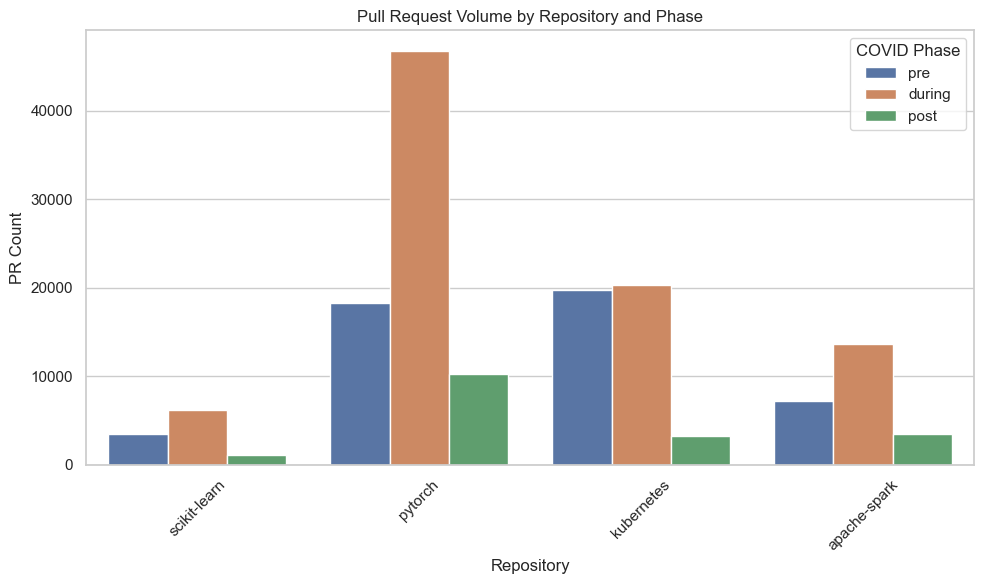

In [14]:
# Melt PR volume across periods for bar plot
pr_volumes = repo_summary.melt(
    id_vars="repository",
    value_vars=["prs_pre", "prs_during", "prs_post"],
    var_name="phase",
    value_name="pr_count"
)

# Clean phase names
pr_volumes["phase"] = pr_volumes["phase"].str.replace("prs_", "")

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=pr_volumes, x="repository", y="pr_count", hue="phase", hue_order=["pre", "during", "post"])
plt.title("Pull Request Volume by Repository and Phase")
plt.ylabel("PR Count")
plt.xlabel("Repository")
plt.xticks(rotation=45)
plt.legend(title="COVID Phase")
plt.tight_layout()
plt.show()
